# Name : Khushi Jain

# DATA SCIENCE AND BUISNESS ANALYTICS

# Task 1 : Prediction using Supervised Machine Learning

# Predict the percentage of a student based on the number of study hours.

Including the required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data from dataset

In [4]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.shape

(25, 2)

Now, Plotting the graph with respect to hours and percentage scored

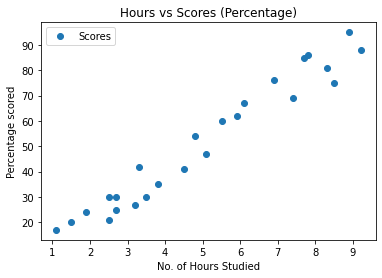

In [9]:
df.plot(x="Hours", y="Scores",style="o")
plt.title("Hours vs Scores (Percentage)")
plt.xlabel("No. of Hours Studied")
plt.ylabel("Percentage scored")
plt.show()

From the above graph one thing come to know that there is positive correlation between the Hours studied and the Percentage score. Hence it is a Linear Regression.

# Preparation of Data

Selecting the Values for x and y labels

In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:,1].values

Now , splitting the data into testing and training datasets

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 0)

# Training the Model

The values taken from the training dataset are trained using linear regression model algorithm.

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
print("Training Successful")

Training Successful


# PLOTTING THE REGRESSION LINE

Now, Printing the coefficient and intercept values required to plot the regression line.

In [13]:
reg.coef_

array([9.91065648])

In [14]:
pt_reg.intercept_

2.018160041434683

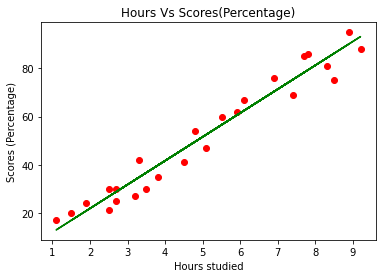

In [15]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x,y,color="red")
plt.title("Hours Vs Scores(Percentage)")
plt.xlabel("Hours studied")
plt.ylabel("Scores (Percentage)")
plt.plot(x,line,color="green")
plt.show()

# PREDICTING THE SCORES

In [16]:
#Testing the data In Hours
print(x_test)

#Predicting the scores
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Predicted data with Actual Data

In [17]:
data = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting the score of the student for given time can be directly calculated by predict functioin

In [18]:
#predict values by own data
hours = [9.25]
own_pred = reg.predict([hours])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = [9.25]
Predicted Score = 93.69173248737538


# EVALUATING THE MODEL

They are used for verifying how well distinct algorithms perform well on datasets. Here , i have evaluated the model using mean absolute error, mean squared error and root mean squared error

In [19]:
from sklearn import metrics
print("Mean Absolure error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolure error: 4.183859899002975
Mean Squared error: 21.5987693072174
Root Mean Squared error: 4.6474476121003665
